Logistic Regression Accuracy: 0.9111111111111111
SVM Accuracy: 0.9111111111111111

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



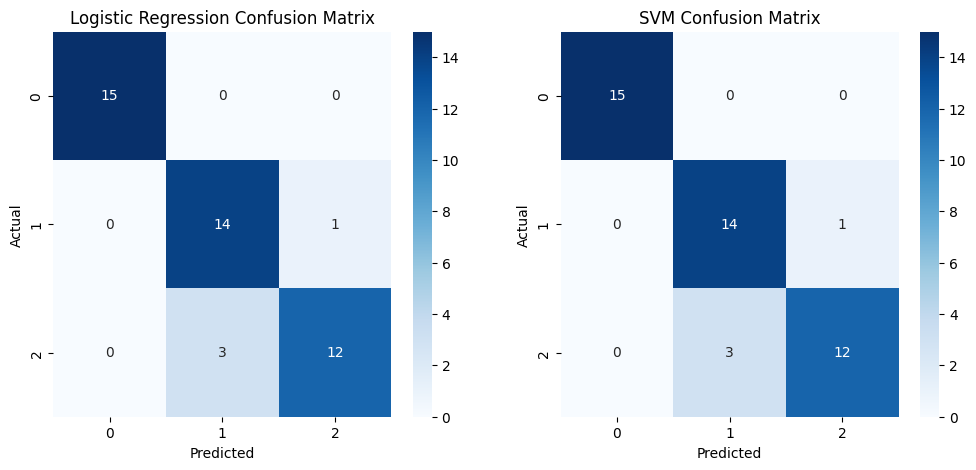

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("iris.csv")


# Encode target variable
df['class'] = df['class'].astype('category').cat.codes

# Select features and target
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Train Support Vector Machine Model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Evaluate models
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion matrices
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('SVM Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')